<font size = '6'><font face = 'times new roman'>
<center><b> Sistem Pendukung Keputusan Penentuan Status Gizi Buruk Pada Balita Menggunakan Metode Fuzzy Mamdani

<font size = '6'><font face = 'times new roman'>
<center>
    <br><b>Nama : Aldi Predyansyah
<br><br><b>NIM : 09011181722020
<br><br><b>Kelas : SK5B
<br><br><b>Mata Kuliah : Kecerdasan Buatan
<br><br><br><b>Dosen Pengampuh : Prof. Dr. Ir. Siti Nurmaini, M.T.
<br><br><br><br>
<br><strong>Jurusan Sistem Komputer
<br><br><b>Fakultas Ilmu Komputer
<br><br><b>Universitas Sriwijaya
<br><br>
<br><b>2019

## <font face = 'times new roman'> IMPORT MODULE
&diams; <font face = 'times new roman'>Import berguna untuk memanggil library yang akan kita gunakan, sehingga kita dapat menggunakan library tersebut beserta file-file yang berada di dalamnya.

In [1]:
#memanggil library yang akan kita gunakan
#skfuzzy adalah library fuzzy logic pada python yang bekerja dengan numpy array
import skfuzzy as fuzz #import library fuzzy dengan deklarasi sebagai fuzz
from skfuzzy import control as ctrl #panggil library control dari skfuzzy dengan inisial ctrl
import numpy as np #import numpy dengan menggunakan inisial np

## <font face = 'times new roman'> PENDEKLARASIAN VARIABEL

In [2]:
#Mendeklarasikan variabel fuzzy yang akan digunakan dengan 3 input dan 1 output
umur = ctrl.Antecedent(np.arange(1, 6, 1), 'Variabel Umur') #Deklarasi variabel umur sebagai input menggunakan inisial umur, interval mulai dari satu, berhenti di 6 dan loncatan sebanyak 1 kali
berat_badan = ctrl.Antecedent(np.arange(1, 13, 1), 'Variabel Berat Badan') #Deklarasi variabel berat badan sebagai input menggunakan inisial berat_badan, interval mulai dari satu, berhenti di 13 dan loncatan sebanyak 1 kali
tinggi_badan = ctrl.Antecedent(np.arange(1, 101, 1), 'Variabel Tinggi Badan') #Deklarasi variabel tinggi badan sebagai input menggunakan inisial tinggi_badan, interval mulai dari satu, berhenti di 101 dan loncatan sebanyak 1 kali
gizi = ctrl.Consequent(np.arange(1, 51, 1), 'Variabel Gizi') #Deklarasi variabel gizi sebagai output menggunakan inisial gizi, interval mulai dari satu, berhenti di 51 dan loncatan sebanyak 1 kali

# <center> <font face = 'times new roman'> FUZZIFIKASI
<font face = 'times new roman'> &diams; Fuzzifikasi merupakan suatu proses untuk mengubah suatu masukan dari bentuk tegas(crisp) menjadi fuzzy(variabel linguistik) yang biasanya disajikan dalam bentuk himpunan-himpunan fuzzy dengan suatu fungsi keanggotaannya masing-masing. <br>&diams; Dalam hal ini terdapat 4 variabel, yaitu 3 variabel input : umur, berat badan, tinggi badan dan 1 variabel output : Gizi.
## Variabel Input  (Antecedents) :
&diams; Umur : Rendah, Sedang, dan Tinggi.
<br>&diams; Berat Badan : Ringan, Sedang, dan Berat.
<br>&diams; Tinggi Badan : Pendek, Sedang, dan Tinggi.
<br>
## Variabel Output (Consequents) :
&diams; Gizi : Sangat Kurang, Cukup, dan Baik.

## <br><font face = 'times new roman'> Variabel Input Umur

Semesta Pembicaraan| Nama Himpunan Fuzzy | Domain | Parameter |
-|-------|:-------|-------|
| Rendah | 1-3 | [1 1 2 3] |
1 - 5| Sedang | 2-4 | [2 3 4] |
| Tinggi | 3-5  | [3 4 5 5] |


<center><b><font face = 'times new roman'>Tabel 1. Himpunan fuzzy variabel <i>Umur

<br><font face = 'times new roman'>Fungsi Keanggotaan Trapezoidal (Rendah), Fungsi Keanggotaan Triangular (Sedang), dan Fungsi Keanggotaan Trapezoidal (Tinggi)<br><br>
$UMUR  [Rendah] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \geq 3 \\
       {3-x \over 3-2} & \mbox{; } 2 < x < 3 \\
       1 & \mbox{; } x ≤ 2
    \end{array}
\right.$

$UMUR  [Sedang] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 2&atau&x \geq 4 \\
       {x-2 \over 3-2} & \mbox{; } 2 < x < 3 \\
       1 & \mbox{; } x = 3 \\
       {4-x \over 4-3} & \mbox{; }3 < x < 4
    \end{array}
\right.$

$UMUR  [Tinggi] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 3 \\
       {x-3 \over 4-3} & \mbox{; } 3 < x < 4 \\
       1 & \mbox{; } x \geq 4 \\
    \end{array}
\right.$

In [3]:
umur['rendah'] = fuzz.trapmf(umur.universe, [1, 1, 2, 3]) #membership function rendah, dalam bentuk trapesium dengan rentang nilai 1 - 3
umur['sedang'] = fuzz.trimf(umur.universe, [2, 3, 4]) #membership function sedang, dalam bentuk segitiga dengan rentang nilai 2 - 4
umur['tinggi'] = fuzz.trapmf(umur.universe, [3, 4, 5, 5]) #membership function tinggi, dalam bentuk trapesium dengan rentang nilai 3 - 5

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


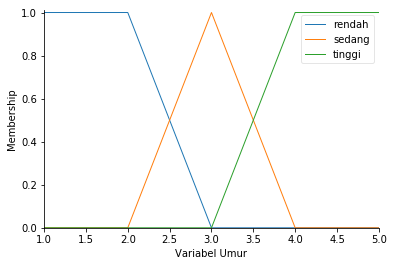

In [4]:
umur.view() #menampilkan grafik dari variabel umur

## <font face = 'times new roman'><br> Variabel Input Berat Badan

Semesta Pembicaraan| Nama Himpunan Fuzzy | Domain | Parameter |
-|-------|:-------|-------|
| Ringan | 1-7 | [1 1 5 7] |
1 - 12| Sedang | 5-9 | [5 7 9] |
| Berat | 7-12  | [7 9 12 12] |

<center><b><font face = 'times new roman'>Tabel 2. Himpunan fuzzy variabel <i>Berat Badan

<font face = 'times new roman'> Fungsi Keanggotaan Trapezoidal (Ringan), Fungsi Keanggotaan Triangular (Sedang), dan Fungsi Keanggotaan Trapezoidal (Berat)

$BERAT BADAN [Ringan] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \geq 7 \\
       {7-x \over 7-5} & \mbox{; } 5 < x < 7 \\
       1 & \mbox{; } x ≤ 5
    \end{array}
\right.$

$BERAT BADAN [Sedang] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 5&atau&x \geq 9 \\
       {x-5 \over 7-5} & \mbox{; } 5 < x < 7 \\
       1 & \mbox{; } x = 7 \\
       {9-x \over 9-7} & \mbox{; }7 < x < 9
    \end{array}
\right.$

$BERAT BADAN [Berat] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x ≤ 7 \\
       {x-7 \over 9-7} & \mbox{; } 7 < x < 9 \\
       1 & \mbox{; } x \geq 9
    \end{array}
\right.$

In [5]:
berat_badan['ringan'] = fuzz.trapmf(berat_badan.universe, [1, 1, 5, 7]) #membership function ringan, dalam bentuk trapesium dengan rentang nilai 1 - 7
berat_badan['sedang'] = fuzz.trimf(berat_badan.universe, [5, 7, 9]) #membership function sedang, dalam bentuk segitiga dengan rentang nilai 5 - 9
berat_badan['berat'] = fuzz.trapmf(berat_badan.universe, [7, 9, 12, 12]) #membership function berat, dalam bentuk trapesium dengan rentang nilai 7 - 12

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


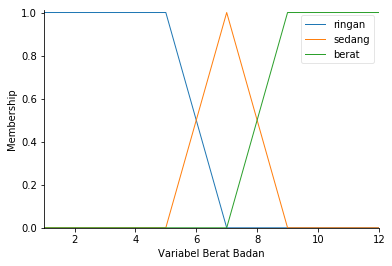

In [6]:
berat_badan.view() #menampilkan grafik dari variabel berat_badan

## <font face = 'times new roman'><br> Variabel Input Tinggi Badan

Semesta Pembicaraan| Nama Himpunan Fuzzy | Domain | Parameter |
-|-------|:-------|-------|
| Pendek | 1-50 | [1 1 25 50] |
1 - 100| Sedang | 25-75 | [25 50 75] |
| Tinggi | 50-100  | [50 75 100 100] |

<center><b><font face = 'times new roman'>Tabel 3. Himpunan fuzzy variabel <i>Tinggi Badan

<font face = 'times new roman'>Fungsi Keanggotaan Trapezoidal (Pendek), Fungsi Keanggotaan Triangular (Sedang), dan Fungsi Keanggotaan Trapezoidal (Tinggi)

$TINGGI BADAN [Pendek] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \geq 50 \\
       {50-x \over 50-25} & \mbox{; } 25 < x < 50 \\
       1 & \mbox{; } x ≤ 25
    \end{array}
\right.$

$TINGGI BADAN [Sedang] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 25&atau&x \geq 75 \\
       {x-25 \over 50-25} & \mbox{; } 25 < x < 50 \\
       1 & \mbox{; } x = 50 \\
       {75-x \over 75-50} & \mbox{; } 50 < x < 75
    \end{array}
\right.$

$TINGGI BADAN [Tinggi] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x ≤ 50 \\
       {x-50 \over 75-50} & \mbox{; } 50 < x < 75 \\
       1 & \mbox{; } x \geq 75
    \end{array}
\right.$

In [7]:
tinggi_badan['pendek'] = fuzz.trapmf(tinggi_badan.universe, [1, 1, 25, 50]) #membership function pendek, dalam bentuk trapesium dengan rentang nilai 1 - 50
tinggi_badan['sedang'] = fuzz.trimf(tinggi_badan.universe, [25, 50, 75]) #membership function sedang, dalam bentuk segitiga dengan rentang nilai 25 - 75
tinggi_badan['tinggi'] = fuzz.trapmf(tinggi_badan.universe, [50, 75, 100, 100]) #membership function tinggi, dalam bentuk trapesium dengan rentang nilai 50 - 100

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


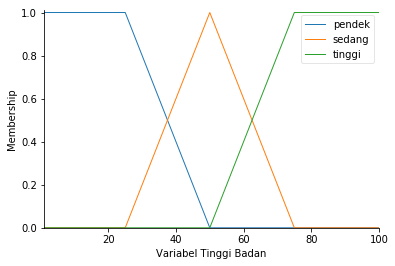

In [8]:
tinggi_badan.view() #menampilkan grafik dari variabel tinggi_badan

## <font face = 'times new roman'><br> Variabel Output Gizi

Semesta Pembicaraan| Nama Himpunan Fuzzy | Domain | Parameter |
-|-------|:-------|-------|
| Pendek | 1-50 | [1 1 25 50] |
1 - 100| Sedang | 25-75 | [25 50 75] |
| Tinggi | 50-100  | [50 75 100 100] |

<center><b><font face = 'times new roman'>Tabel 4. Himpunan fuzzy variabel <i>Gizi

<font face = 'times new roman'>Fungsi Keanggotaan Trapezoidal (Kurang), Fungsi Keanggotaan Triangular (Cukup), dan Fungsi Keanggotaan Trapezoidal (Baik)

$GIZI [Kurang] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \geq 25 \\
       {25-x \over 25-25} & \mbox{; } 15 < x < 25 \\
       1 & \mbox{; } x ≤ 15
    \end{array}
\right.$

$GIZI [Cukup] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 15&atau&x \geq 35 \\
       {x-15 \over 25-15} & \mbox{; } 15 < x < 25 \\
       1 & \mbox{; } x = 25 \\
       {35-x \over 35-25} & \mbox{; } 25 < x < 35
    \end{array}
\right.$

$GIZI [Baik] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x ≤ 25 \\
       {x-25 \over 35-25} & \mbox{; } 25 < x < 35 \\
       1 & \mbox{; } x \geq 35
    \end{array}
\right.$

In [9]:
#fungsi keanggotaan output
gizi['kurang'] = fuzz.trapmf(gizi.universe, [0, 0, 15, 25]) #membership function sangat kurang, dalam bentuk trapesium dengan rentang nilai 1 - 25
gizi['cukup'] = fuzz.trimf(gizi.universe, [15, 25, 35]) #membership function kurang, dalam bentuk segitiga dengan rentang nilai 15 - 35
gizi['baik'] = fuzz.trapmf(gizi.universe, [25, 35, 50, 50]) #membership function cukup, dalam bentuk trapesium dengan rentang nilai 25 - 50

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


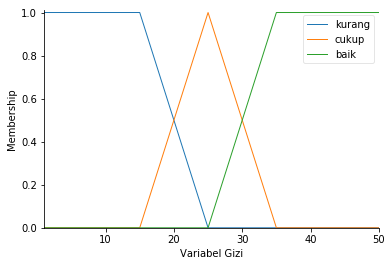

In [10]:
gizi.view() #menampilkan grafik dari variabel gizi

## <center> <font face = 'times new roman'> RULE BASE

<font face = 'times new roman'>Pada kasus ini terdapat 27 rule base yang ditunjukkan pada tabel dibawah ini :

| No |    Umur   | Berat Badan | Tinggi Badan |     Gizi    |
|----|-----------|-------------|-------------|-------------|
| 1  |   Rendah  |   Ringan   |   Pendek   |   Kurang   |
| 2  |   Rendah  |   Ringan   |   Sedang    |   Kurang    |
| 3  |   Rendah  |   Ringan   |   Tinggi    |   Kurang   |
| 4  |   Rendah  |   Sedang    |   Pendek   |   Kurang   |
| 5  |   Rendah  |   Sedang    |   Sedang    |   Cukup    |
| 6  |   Rendah  |   Sedang    |   Tinggi    |   Cukup   |
| 7  |   Rendah  |   Berat    |   Pendek   |   Kurang    |
| 8  |   Rendah  |   Berat    |   Sedang    |   Cukup    |
| 9  |   Rendah  |   Berat    |   Tinggi    |   Baik   |
| 10 |   Sedang  |   Ringan   |   Pendek   |   Kurang   |
| 11 |   Sedang  |   Ringan   |   Sedang    |   Cukup    |
| 12 |   Sedang  |   Ringan   |   Tinggi    |   Cukup   |
| 13 |   Sedang  |   Sedang    |   Pendek   |   Cukup   |
| 14 |   Sedang  |   Sedang    |   Sedang    |   Cukup    |
| 15 |   Sedang  |   Sedang    |   Tinggi    |   Baik   |
| 16 |   Sedang  |   Berat    |   Pendek   |    Cukup   |
| 17 |   Sedang  |   Berat    |   Sedang    |   Cukup    |
| 18 |   Sedang  |   Berat    |   Tinggi    |   Baik   |
| 19 |   Tinggi  |   Ringan   |   Pendek   |   Kurang   |
| 20 |   Tinggi  |   Ringan   |   Sedang    |   Cukup  |
| 21 |   Tinggi  |   Ringan   |   Tinggi    |   Baik   |
| 22 |   Tinggi  |   Sedang    |   Pendek   |   Kurang   |
| 23 |   Tinggi  |   Sedang    |   Sedang    |   Cukup   |
| 24 |   Tinggi  |   Sedang    |   Tinggi    |   Baik   |
| 25 |   Tinggi  |   Berat    |   Pendek   |   Baik   |
| 26 |   Tinggi  |   Berat    |   Sedang    |   Baik   |
| 27 |   Tinggi  |   Berat    |   Tinggi    |   Baik   |

<center><b><font face = 'times new roman'>Tabel 5. Rule Base Fuzzy

In [11]:
#membuat aturan untuk menentukan gizi dari balita
#karena input ada 3 dan setiap input mempunyai tiga kondisi maka aturannya sebanyak 27 atau 3^3
rule1 = ctrl.Rule(umur['rendah'] & berat_badan['ringan'] & tinggi_badan['pendek'], gizi['kurang'])
rule2 = ctrl.Rule(umur['rendah'] & berat_badan['ringan'] & tinggi_badan['sedang'], gizi['kurang'])
rule3 = ctrl.Rule(umur['rendah'] & berat_badan['ringan'] & tinggi_badan['tinggi'], gizi['kurang'])
rule4 = ctrl.Rule(umur['rendah'] & berat_badan['sedang'] & tinggi_badan['pendek'], gizi['kurang'])
rule5 = ctrl.Rule(umur['rendah'] & berat_badan['sedang'] & tinggi_badan['sedang'], gizi['cukup'])
rule6 = ctrl.Rule(umur['rendah'] & berat_badan['sedang'] & tinggi_badan['tinggi'], gizi['cukup'])
rule7 = ctrl.Rule(umur['rendah'] & berat_badan['berat'] & tinggi_badan['pendek'], gizi['kurang'])
rule8 = ctrl.Rule(umur['rendah'] & berat_badan['berat'] & tinggi_badan['sedang'], gizi['cukup'])
rule9 = ctrl.Rule(umur['rendah'] & berat_badan['berat'] & tinggi_badan['tinggi'], gizi['baik'])

rule10 = ctrl.Rule(umur['sedang'] & berat_badan['ringan'] & tinggi_badan['pendek'], gizi['kurang'])
rule11 = ctrl.Rule(umur['sedang'] & berat_badan['ringan'] & tinggi_badan['sedang'], gizi['cukup'])
rule12 = ctrl.Rule(umur['sedang'] & berat_badan['ringan'] & tinggi_badan['tinggi'], gizi['cukup'])
rule13 = ctrl.Rule(umur['sedang'] & berat_badan['sedang'] & tinggi_badan['pendek'], gizi['cukup'])
rule14 = ctrl.Rule(umur['sedang'] & berat_badan['sedang'] & tinggi_badan['sedang'], gizi['cukup'])
rule15 = ctrl.Rule(umur['sedang'] & berat_badan['sedang'] & tinggi_badan['tinggi'], gizi['baik'])
rule16 = ctrl.Rule(umur['sedang'] & berat_badan['berat'] & tinggi_badan['pendek'], gizi['cukup'])
rule17 = ctrl.Rule(umur['sedang'] & berat_badan['berat'] & tinggi_badan['sedang'], gizi['cukup'])
rule18 = ctrl.Rule(umur['sedang'] & berat_badan['berat'] & tinggi_badan['tinggi'], gizi['baik'])

rule19 = ctrl.Rule(umur['tinggi'] & berat_badan['ringan'] & tinggi_badan['pendek'], gizi['kurang'])
rule20 = ctrl.Rule(umur['tinggi'] & berat_badan['ringan'] & tinggi_badan['sedang'], gizi['cukup'])
rule21 = ctrl.Rule(umur['tinggi'] & berat_badan['ringan'] & tinggi_badan['tinggi'], gizi['baik'])
rule22 = ctrl.Rule(umur['tinggi'] & berat_badan['sedang'] & tinggi_badan['pendek'], gizi['kurang'])
rule23 = ctrl.Rule(umur['tinggi'] & berat_badan['sedang'] & tinggi_badan['sedang'], gizi['cukup'])
rule24 = ctrl.Rule(umur['tinggi'] & berat_badan['sedang'] & tinggi_badan['tinggi'], gizi['baik'])
rule25 = ctrl.Rule(umur['tinggi'] & berat_badan['berat'] & tinggi_badan['pendek'], gizi['baik'])
rule26 = ctrl.Rule(umur['tinggi'] & berat_badan['berat'] & tinggi_badan['sedang'], gizi['baik'])
rule27 = ctrl.Rule(umur['tinggi'] & berat_badan['berat'] & tinggi_badan['tinggi'], gizi['baik'])

C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2746f2bfcf8>)

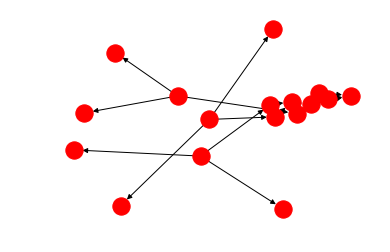

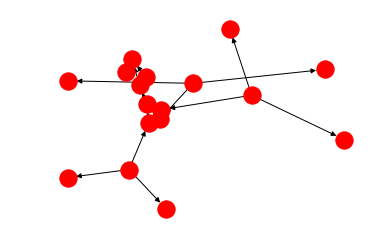

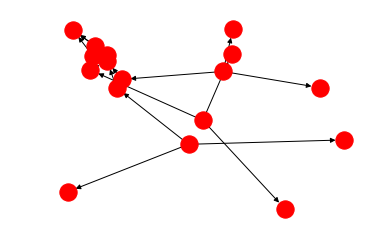

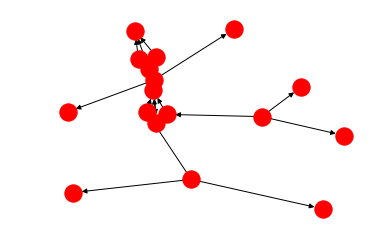

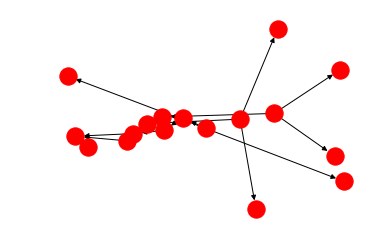

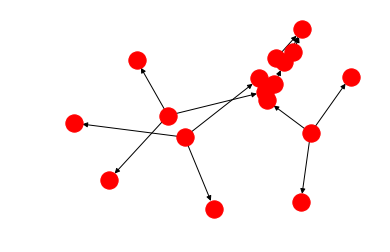

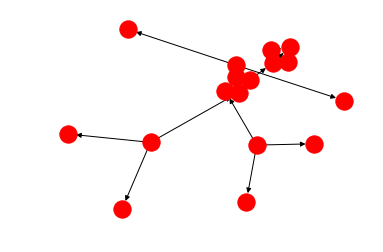

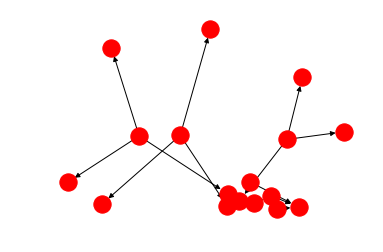

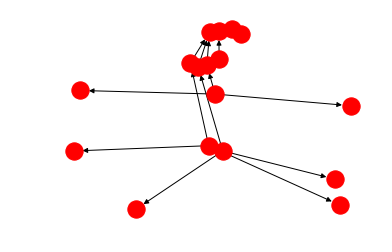

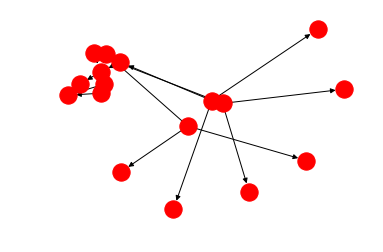

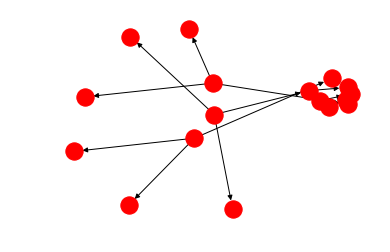

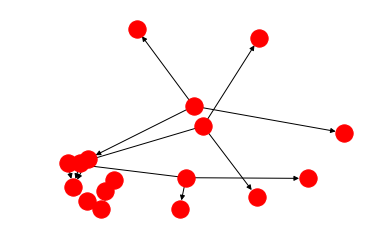

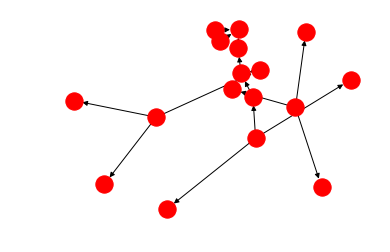

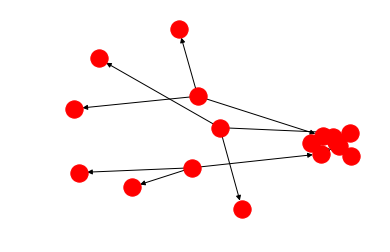

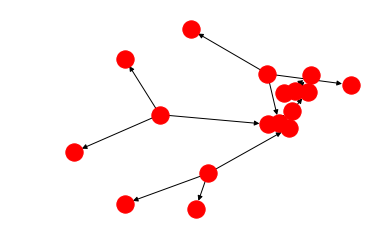

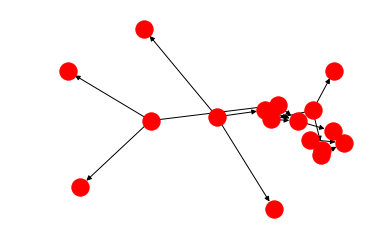

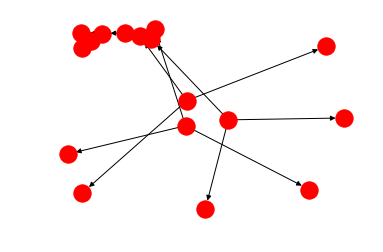

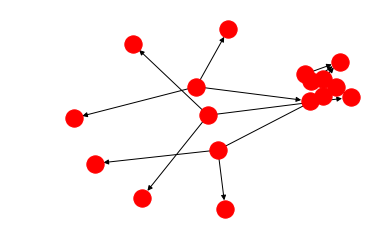

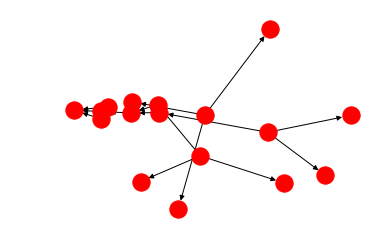

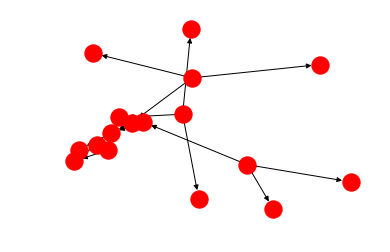

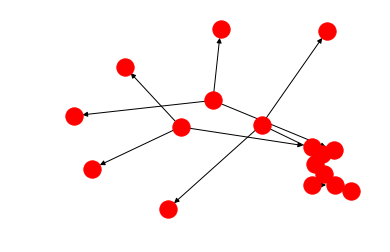

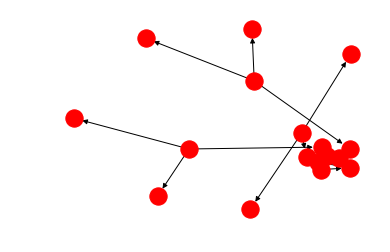

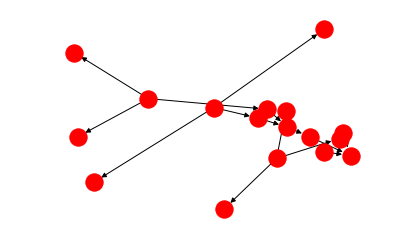

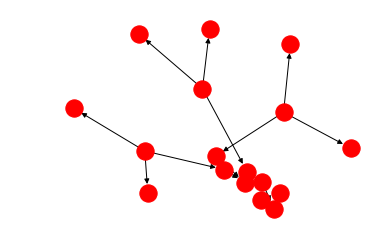

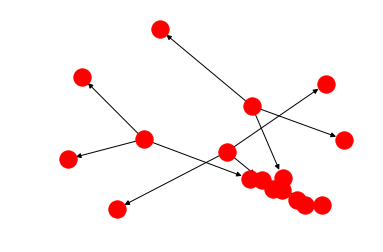

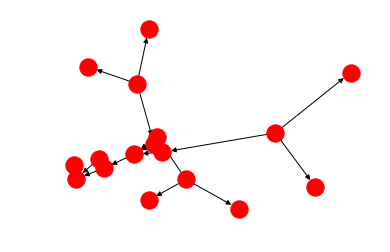

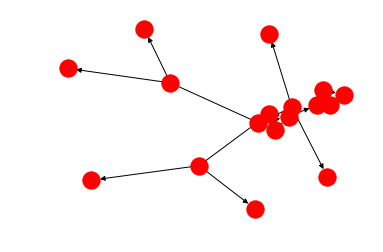

In [12]:
#menampilkan semua rule yang telah dibuat diatas
rule1.view()
rule2.view()
rule3.view()
rule4.view()
rule5.view()
rule6.view()
rule7.view()
rule8.view()
rule9.view()
rule10.view()
rule11.view()
rule12.view()
rule13.view()
rule14.view()
rule15.view()
rule16.view()
rule17.view()
rule18.view()
rule19.view()
rule20.view()
rule21.view()
rule22.view()
rule23.view()
rule24.view()
rule25.view()
rule26.view()
rule27.view()

## <CENTER><font face = 'times new roman'> FUZZY INFERENSI SISTEM
<font face='times new roman'>Dari beberapa metode dalam fuzzy inference system, metode yang digunakan adalah Metode Mamdani.

In [13]:
gizi_rule1 = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, 
                                rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18,
                                rule19, rule20, rule21, rule22, rule23, rule24, rule25, rule26, rule27,])

<font face='times new roman'>Untuk mensimulasikan sistem kontrol ini, maka dibuat ControlSystemSimulation. Objek ini mewakili pengontrol yang diterapkan pada serangkaian situasi tertentu. 

In [14]:
gizi_rule = ctrl.ControlSystemSimulation(gizi_rule1)

## <CENTER> <font face = 'times new roman'> DEFUZZIFIKASI

<font face='times new roman'>&emsp;Pada kasus kali ini kita akan mengukur gizi balita dengan tiga syarat masukkan yaitu umur balita, berat badan balita, dan tinggi badan balita. Dari ketiga syarat tersebut maka akan menghasilkan keluaran gizi yang menunjukkan bahwa balita tersebut tergolong kedalam gizi kurang, gizi cukup atau gizi baik.<br>
Maka kita harus memasukkan tiga variabel yang disediakan guna memenuhi syarat untuk mengetahui gizi dari balita tersebut.

### <font face='times new roman'> Contoh Kasus
<font face='times new roman'>Sebagai contoh kita mempunyai seorang balita yang berusia 2,5 tahun dengan memiliki berat badan 10kg dan tinggi badan 80 cm, maka kita akan mengukur apakah balita tersebut tergolong kedalam gizi kurang, gizi cukup atau gizi baik?

In [15]:
#membuat interupsi yang meminta inputan dari keyboard
gizi_rule.input['Variabel Umur'] = float(input('Umur : ')) #membuat inputan untuk variabel Umur
gizi_rule.input['Variabel Berat Badan'] = float(input('Berat Badan : ')) #membuat inputan untuk variabel Berat Badan
gizi_rule.input['Variabel Tinggi Badan'] = float(input('Tinggi Badan : ')) #membuat inputan untuk variabel Tinggi Badan

Umur : 2.5
Berat Badan : 10
Tinggi Badan : 80


<font face='times new roman'>Dan berikut tampilan hasil output gizi yang memiliki tiga himpunan yaitu kurang, cukup, dan baik. Berdasarkan hasil inputan diatas maka hasil dari keluaran gizi adalah 38.7037, dengan hasil tersebut menunjukkan bahwa balita tergolong kedalam gizi baik.

In [16]:
gizi_rule.compute() #menghitung hasil dari yang kita inputkan
print(gizi_rule.output['Variabel Gizi']) #mencetak hasil output dari gizi sesuai dengan yang diinputkan diatas

38.7037037037037


### <font face='times new roman'> Berikut tampilan grafik dari keluaran gizi :

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


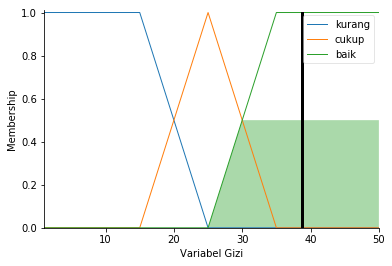

In [17]:
gizi.view(sim=gizi_rule) #menampilkan grafik dari gizi

## <font face='times new roman'> Perhitungan Manual

### <font face='times new roman'>Inputan
<font face='times new roman'>Umur : 2.5
<br>Berat Badan : 10
<br>Tinggi Badan : 80

<font face='times new roman'> Derajat Keanggotaan Variabel Umur
- $μUmur [Rendah] =
\left\{
    \begin{array}{ll}
       {3-2.5 \over 3-2} & \mbox{; } 2 \leq x < 3
    \end{array}
\right.$

- $μUmur [Rendah] >>
    \begin{array}{ll}
       {0.5 \over 1} & \mbox{= }
    \end{array} 0.5 $


- $μUmur [Sedang] = 
\left\{
    \begin{array}{ll}
       {2.5-2 \over 3-2} & \mbox{; } 2 \leq x < 3
    \end{array}
\right.$
 
- $μUmur [Sedang] >>
    \begin{array}{ll}
       {0.5 \over 1} & \mbox{= }
    \end{array} 0.5 $


- $μUmur [Tinggi] = 0$

Derajat Keanggotaan Variabel Berat Badan
- $μBerat Badan [Ringan] = 0$


- $μBerat Badan [Sedang] = 0$


- $μBerat Badan [Berat] = 1$



Derajat Keanggotaan Variabel Tinggi Badan
- $Tinggi Badan [Pendek] = 0$


- $μTinggi Badan [Sedang] = 0$


- $μTinggi Badan [Tinggi] = 1$


<font face = 'times new roman'>
-  $ x =
    \begin{array}{ll}
    {((25x0)+(26x0,1)+(27x0,2)+(28x0,3)+(29x0,4) + (30+31+32+33+34+35+36+37+38+39+40+41+42+43+44+45+46+47+48+49+50)x0,5) \over (0,5x21)+0+0,1+0,2+0,3+0,4}
    \end{array}$
    $=
   \begin{array}{ll}
   {0+2,6+5,4+8,4+11,6+420 \over 10,5+1}
   \end{array}$
   $=
   \begin{array}{ll}
   {448 \over 11,5}
   \end{array} = 38,9565217 $

### <br><font face='times new roman'> Referensi
<font face='times new roman'>Dian Permata Sari.2017.Sistem Pendukung Keputusan Penentuan Status Gizi Buruk Pada Balita Menggunakan Metode Fuzzy Mamdani.Jurnal Edik Informatika Penelitian Bidang Komputer Sains dan Pendidikan Informatika V1.i1(131-137)
